In [ ]:
%matplotlib inline


# Nearest Neighbors Classification

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data.


https://scikit-learn.org/stable/modules/neighbors.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
def plot_samples(X, y,mode):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']

     # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification ('%s')"
              % mode)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    plt.show()

In [ ]:
def plot_decision_boundary(X, y):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']

     # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    plt.show()

In [ ]:
def plot_decision_boundary_with_lables(clf,X, y_predicted,y_true,mode):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']

     # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y_true],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%s : 3-Class classification (k = %i, weights = '%s')"
              % (mode,n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    plt.show()

In [ ]:
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

print(np.shape(X))

(150, 2)


In [ ]:
from sklearn.model_selection import train_test_split

test_size=0.7# Test-set fraction

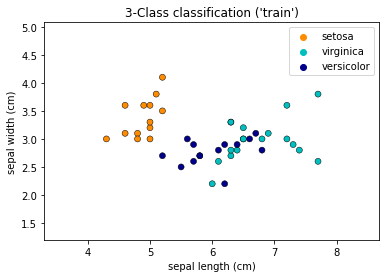

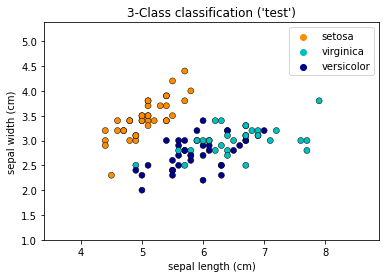

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 12)
plot_samples(X_train, y_train,'train')
plot_samples(X_test, y_test,'test')


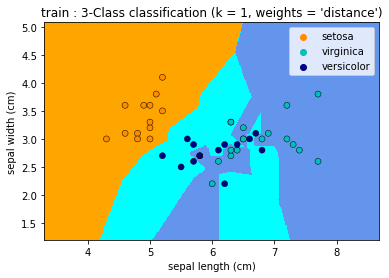

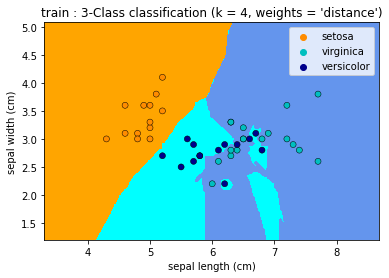

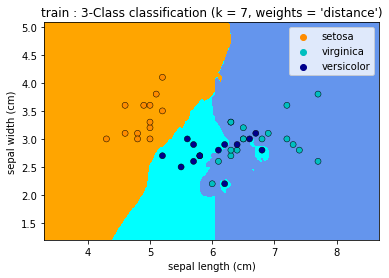

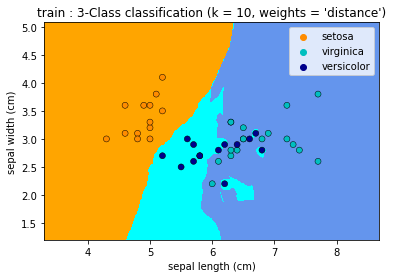

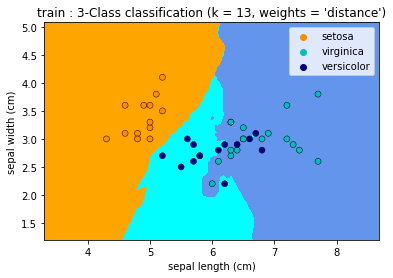

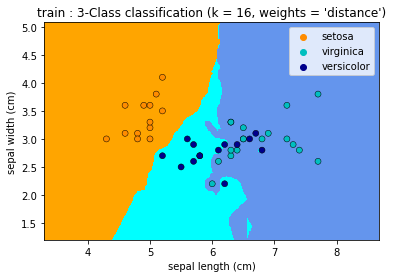

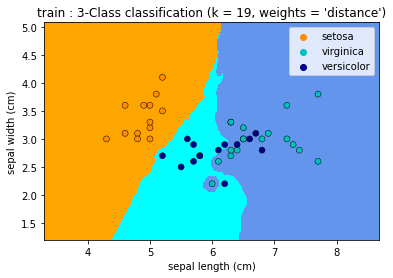

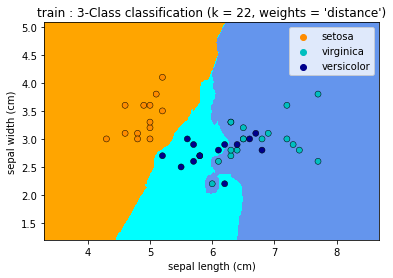

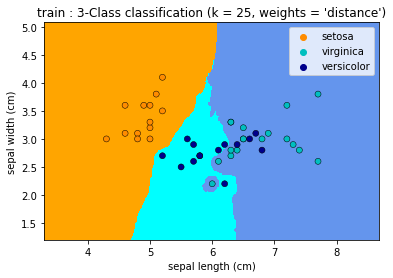

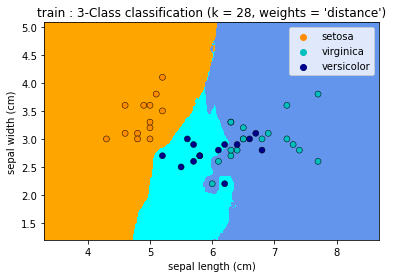

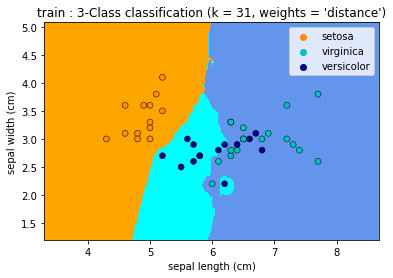

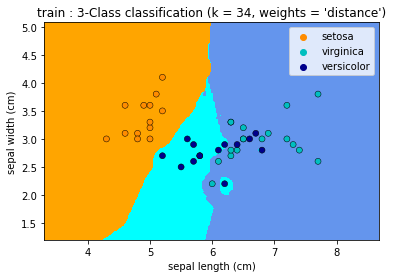

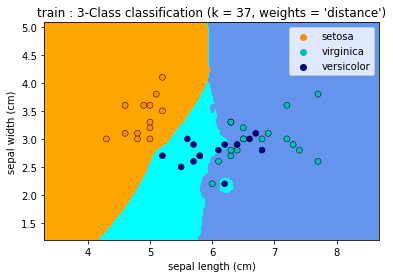

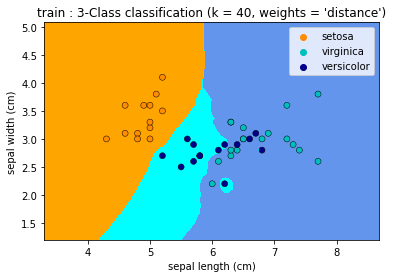

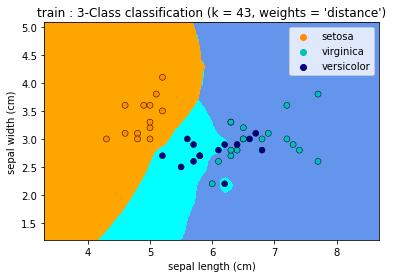

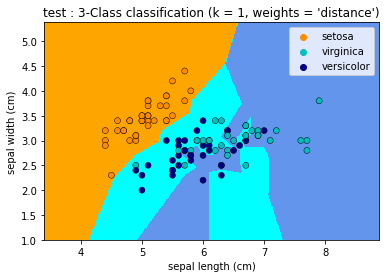

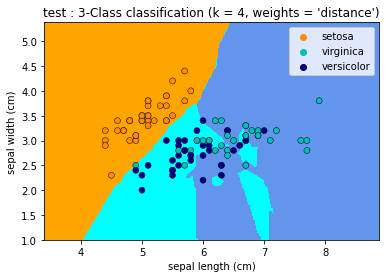

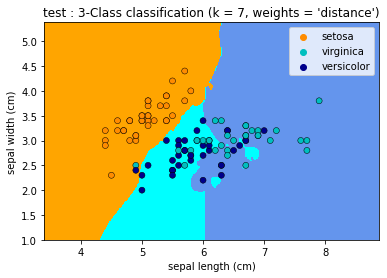

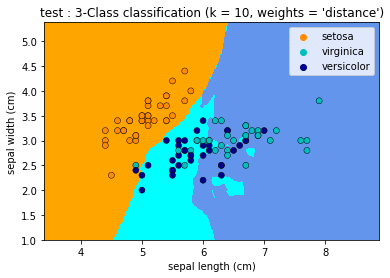

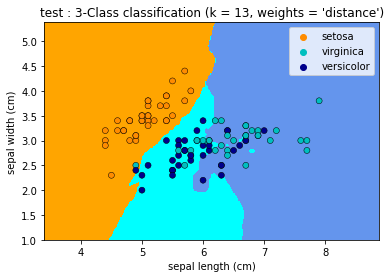

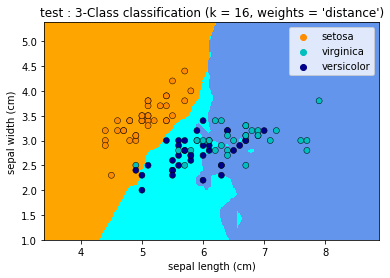

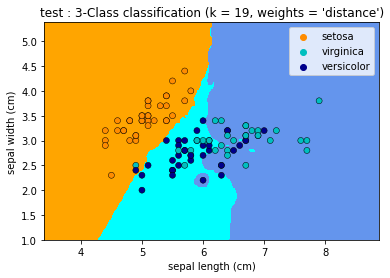

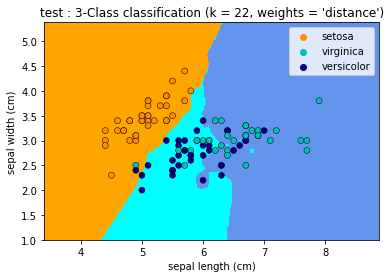

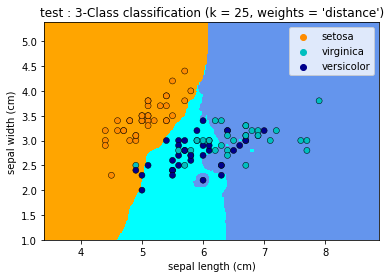

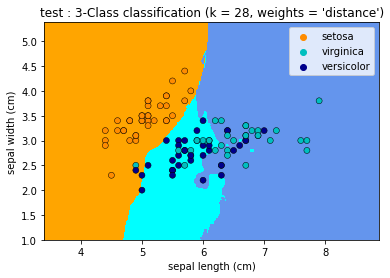

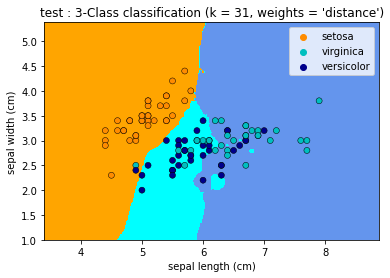

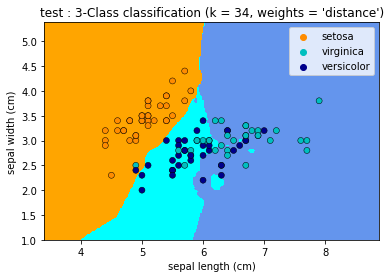

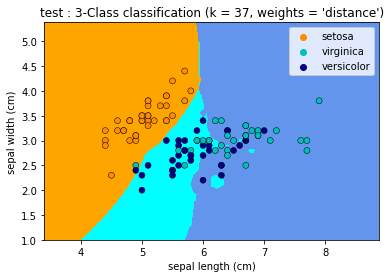

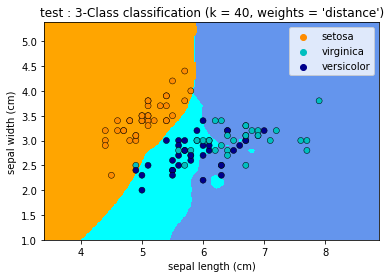

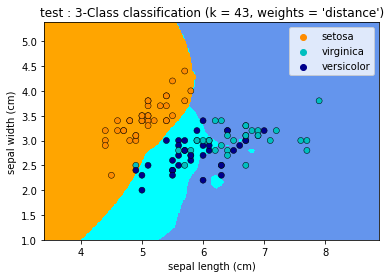

In [ ]:
clfs = []
accuracy_all = []
weights = 'distance'
for n_neighbors in range(1,45,3):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    plot_decision_boundary_with_lables(clf,X_train,y_train,y_train,'train')
for ind,n_neighbors in enumerate(range(1,45,3)): 
    clf = clfs[ind]
    predicted_labels = clf.predict(X_test)
    misclassified = np.sum((predicted_labels!=y_test))
    plot_decision_boundary_with_lables(clf,X_test,predicted_labels,y_test,'test')
    accuracy_all.append((len(y_test)-misclassified)/len(y_test))



[0.7904761904761904, 0.8095238095238095, 0.8095238095238095, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.819047619047619, 0.819047619047619, 0.819047619047619, 0.8285714285714286, 0.819047619047619, 0.819047619047619, 0.819047619047619, 0.8095238095238095]


Text(0, 0.5, 'Accuracy')

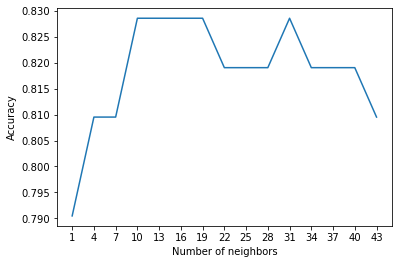

In [ ]:
print(accuracy_all)
plt.plot(accuracy_all)
plt.xticks(range(0,15),range(1,45,3))
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# Recommendation System with Collaborative Filtering using Nearest Neighbors

We are going to set up movie recommendation system. In this system, We are going to use nearest neighbors algorithm and collaborative filtering. We are using MovieLens 20M Dataset.
<br>
**Source: https://www.kaggle.com/ecemboluk/recommendation-system-with-cf-using-knn**
<br>
Link to download dataset: 
https://www.kaggle.com/grouplens/movielens-20m-dataset?select=movie.csv<br>
<img src="https://miro.medium.com/max/15721/0*3C6CUn1FEC_raM8c" width="700" height="700">

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\genome_scores.csv
data\genome_tags.csv
data\link.csv
data\movie.csv
data\rating.csv
data\tag.csv


### **Let's describe dataset:**

This dataset has 6 csv files. We are going to use movie.csv and rating.csv. First, let analyze these csv files. 

rating.csv that contains ratings of movies by users:

* userId
* movieId
* rating
* timestamp

movie.csv that contains movie information:

* movieId
* title
* genres

In [ ]:
data_movie = pd.read_csv("data/movie.csv")
data_rating = pd.read_csv("data/rating.csv")

From the movie.csv file, we will use movieId and title columns. We are creating new dataframe using these two columns. <br>At the same time, as we will use userId, movieId and rating columns. We are creating new dataframe using these three columns from rating.csv. 

In [ ]:
movie = data_movie.loc[:,{"movieId","title"}]
rating = data_rating.loc[:,{"userId","movieId","rating"}]
print(movie.head())
print(rating.head())

   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)
   movieId  userId  rating
0        2       1     3.5
1       29       1     3.5
2       32       1     3.5
3       47       1     3.5
4       50       1     3.5


We are combining two dataframe (movie and rating) and are creating movie vs user matrix.

Pandas pivot table: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html 
<br>
Pandas merge: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [ ]:
data = pd.merge(movie,rating)
print(data.shape)
print(data.head())
data = data.iloc[:1000000,:] # Selecting a smaller part of the dataset (1mil)
user_movie_table = data.pivot_table(index = ["title"],columns = ["userId"],values = "rating").fillna(0)
user_movie_table.head(10)

(20000263, 4)
   movieId             title  userId  rating
0        1  Toy Story (1995)       3     4.0
1        1  Toy Story (1995)       6     5.0
2        1  Toy Story (1995)       8     4.0
3        1  Toy Story (1995)      10     4.0
4        1  Toy Story (1995)      11     4.5


userId,1,2,3,4,5,6,7,8,10,11,...,138484,138485,138486,138487,138488,138489,138490,138491,138492,138493
title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: When Nature Calls (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.5,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Across the Sea of Time (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Amazing Panda Adventure, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"American President, The (1995)",0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angela (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angels and Insects (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Anne Frank Remembered (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antonia's Line (Antonia) (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
Assassins (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# What is the Recommendation System?

* Based on previous(past) behaviours, it predicts the likelihood that a user would prefer an item.
* For example, Netflix uses a recommendation system. It suggests people new movies according to their past activities that are like watching and voting movies.
* The purpose of a recommender systems is recommending new things that are not seen before from people.
* There are several methods in recommendation systems. In this lab, we will use collaborative filtering method. 

## Collaborative Filtering

Collaborative filtering is making recommendations according to a combination of your experience and experiences of other people. There are two collaborative filtering methods: User Based CF and Item Based CF.

### User Based Collaborative Filtering

It is calculated as a similarity among people in user vs item matrix. For example, lets assume there are two persons. The first one watched two movies which are "The Lord of the Rings" and "Hobbit". The second person has only watched "The Lord of the Rings" movie. This system recommends "Hobbit" movie to second person. 

User based collaborative filtering has some problems. In this system, each row of the matrix is a user. Therefore, comparing and finding similarity between of them is computationaly hard and requires too much computational power. Also, habits of people can change over time. Therefore, making correct and useful recommendation can be hard in time.

In order to solve these problems, lets look at another recommender system that is the item based collaborative filtering.

### Item Based Collaborative Filtering

It is calculated to find similar items in user vs item matrix. For example, lets assume that we have two movies: "Lord of the Rings" and "Hobbit". Three people watched "Lord of the Rings" and "Hobbit". If the fourth person watches "Lord of the Rings", he/she could like "Hobbit". Therefore, this system recommends "Hobbit" to fourth people. 

In general, recommendation systems use the item based collaborative filtering. Item based CF improves user based CF. As people minds and habits can change and items doesn't change.

There are various methods in order to find similarity. In this kernel, we use the KNN algorithm in order to find similarity. 

## What is the K-Nearest Neighbor Algorithm?

KNN is used for both classification and regression problems. In classification problems, to predict the label of an instance, we first find the k closest instances to the given one based on the distance metric and based on the majority voting scheme or weighted majority voting(neighbors which are closer are weighted higher). Then, we predict the labels.

K-nearest neighbor finds the k most similar items to a particular instance based on a given distance metric like euclidean, jaccard similarity , minkowsky or custom distance measures. In this model, we use cosine distance as metric. 

In [ ]:
# We choose a random movie.
query_index = np.random.choice(user_movie_table.shape[0])
print("Choosen Movie is: ",user_movie_table.index[query_index])

Choosen Movie is:  Tom and Huck (1995)


https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

user_movie_table_matrix = csr_matrix(user_movie_table.values)
print(user_movie_table_matrix)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_movie_table_matrix)
distances, indices = model_knn.kneighbors(user_movie_table.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)
print(indices)

  (0, 3)	3.0
  (0, 7)	1.0
  (0, 9)	3.5
  (0, 11)	3.0
  (0, 17)	2.5
  (0, 23)	3.0
  (0, 25)	3.0
  (0, 28)	3.0
  (0, 43)	3.0
  (0, 44)	3.0
  (0, 59)	3.0
  (0, 60)	4.0
  (0, 62)	3.5
  (0, 67)	2.0
  (0, 75)	1.0
  (0, 76)	2.0
  (0, 79)	2.0
  (0, 80)	4.0
  (0, 88)	2.0
  (0, 102)	2.5
  (0, 106)	3.0
  (0, 115)	3.0
  (0, 116)	3.0
  (0, 120)	0.5
  (0, 124)	2.0
  :	:
  (145, 120155)	2.5
  (145, 120210)	3.0
  (145, 120247)	3.5
  (145, 120268)	4.0
  (145, 120570)	3.0
  (145, 120680)	2.0
  (145, 120709)	3.0
  (145, 120799)	3.0
  (145, 121089)	1.0
  (145, 121094)	3.0
  (145, 121196)	3.0
  (145, 121378)	4.0
  (145, 121458)	5.0
  (145, 121738)	3.5
  (145, 121905)	4.5
  (145, 121977)	4.0
  (145, 122083)	3.0
  (145, 122099)	3.0
  (145, 122151)	3.5
  (145, 122186)	2.0
  (145, 122325)	5.0
  (145, 122456)	3.5
  (145, 122648)	4.0
  (145, 122896)	2.0
  (145, 123150)	5.0
[[131  17   2  73 102  74]]


In this below section, you can see recommendations for Up Close and Personal movie. 

In [ ]:
movie = []
distance = []

for i in range(0, len(distances.flatten())):
    if i != 0:
        movie.append(user_movie_table.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])    

m=pd.Series(movie,name='movie')
d=pd.Series(distance,name='distance')
recommend = pd.concat([m,d], axis=1)
recommend = recommend.sort_values('distance',ascending=False)

print('Recommendations for {0}:\n'.format(user_movie_table.index[query_index]))
for i in range(0,recommend.shape[0]):
    print('{0}: {1}, with distance of {2}'.format(i, recommend["movie"].iloc[i], recommend["distance"].iloc[i]))

Recommendations for Tom and Huck (1995):

0: It Takes Two (1995), with distance of 0.7986290930773714
1: Now and Then (1995), with distance of 0.79215705057677
2: Indian in the Cupboard, The (1995), with distance of 0.7848501887744563
3: Amazing Panda Adventure, The (1995), with distance of 0.7707640190293854
4: Big Green, The (1995), with distance of 0.7263212579843172


# Conclusion

* Recommendation systems predict according to previous experience. 
* There are two methods for CF: User based and Item based.
* How to find between two items by using machine learning algorith (KNN)
* How to set up basic recommendation system.
* How to work with recommendation systems.
